# **Task # 2 -To Explore Supervised Machine Learning**

**Data**:

The dataset contains samples with two attributes Hours and Scores.

**Target**:

To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

**Approach**:

matplotlib and seaborn for EDA and model training using Linear Regression.

# **Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Loading Data**

In [ ]:
#Reading data from a remote link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
s_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
s_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
s_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


On an average a student studies 5 hours a day and gets score equals to 51

# **Data Visualisation**

**Visualising whole dataset distribution**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


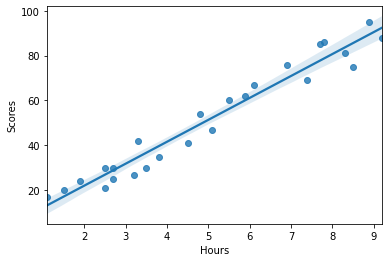

In [ ]:
import seaborn as sns
sns.regplot(x="Hours", y="Scores", data=s_data);

It can be seen that there is a positive linear relation between Hours and Scores.

# **Training Model**

**Splitting Data into X and y**

In [ ]:
X = s_data.iloc[:,:-1].values
y = s_data.iloc[:, -1].values

**Splitting Data into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,  y_train, y_test = train_test_split(X, y, test_size = 0.2)

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# **Visualising the Training set results**

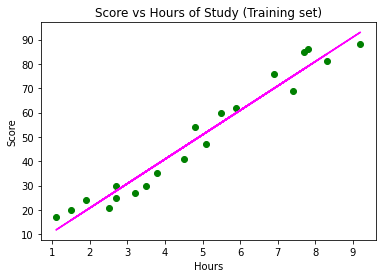

In [ ]:
plt.scatter(X_train, y_train, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'magenta')
plt.title('Score vs Hours of Study (Training set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# **Test set prediction**

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([85.98084251, 89.98958224, 25.84974655, 33.86722601, 61.92840413])

# **Visualising the Test set results**

In [ ]:
y_test

array([75, 95, 30, 42, 67])

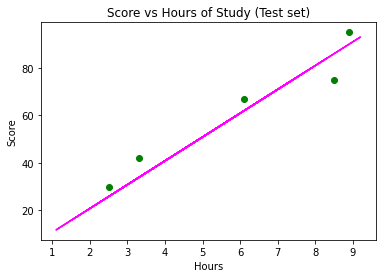

In [ ]:
plt.scatter(X_test, y_test, color = 'green')
plt.plot(X_train, regressor.predict(X_train), color = 'magenta')
plt.title('Score vs Hours of Study (Test set)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

# **Evaluation**

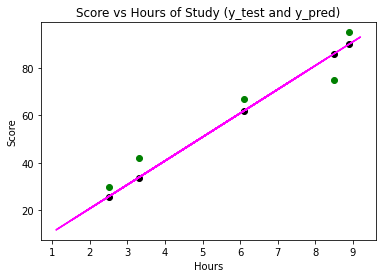

In [ ]:
#plotting x_test scatter plot in green
plt.scatter(X_test, y_test, color = 'green')
#plotting scatter plot with X_pred in black
plt.scatter(X_test, y_pred, color = 'black')
#plotting linear plot of X_train in magenta 
plt.plot(X_train, regressor.predict(X_train), color = 'magenta')
plt.title('Score vs Hours of Study (y_test and y_pred)')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

we can see how predicted values(black dots) are completely overlaping the linear plot(magenta) of trainig set whereas the actual values are showed in green dots.

**Predicted and actual scores**

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[85.98084251 75.        ]
 [89.98958224 95.        ]
 [25.84974655 30.        ]
 [33.86722601 42.        ]
 [61.92840413 67.        ]]


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score
r2_s =r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

6.669176717357109

In [ ]:
r2_s

0.9058774606294038

**The r2 score is 0.90 which means 90% of our data fits the model.**

**Q.What will be the predicted score if a student study for 9.25 hrs in a day?**

In [ ]:
predicted_score = regressor.predict([[9.25]])
predicted_score

array([93.49722951])

**The predicted score is 93.4%**